#  Instructions (please read carefully): 

1. All answers should be included in this file, either in a Code or Markdown cell. Extras have been created to indicate where to respond, but you can add additional ones if you see fit. **Do NOT delete any of the existing code/text.**
2. Use provided code as you wish, write your own if you prefer. **Do NOT delete any of the existing code/text.**
3. All conceptual questions must be answered in a Markdown cell, but you don't have to worry about formal equation formatting if you don't feel comfortable with it. 
4. There are 5 problems in total.
5. Allowed to use: All class notes, slides, Jupyter Notebooks, Homework solutions, tutorials.
6. Not allowed: <br>
    i. General web, google, or other blogs etc., <br>
    ii. Communicate with others during exam. <br>
    iii. Share exam with others at ANY time.
    
7. You must submit your completed Jupyter notebook within **3 and 1/2 hours after start time**. This time includes extra time for downloading, uploading, technical/internet difficulties, potential installation issues. DO NOT keep working to submit exam beyond 3 hrs 15 minutes, unless facing an issue which you should have communicated with instructor. Last minute emails, because "sumbit" did not work will NOT be accepted. 
8. Because everyone is taking exam at a different time, no clarification questions will be answered on Piazza. Any posts will be deleted.
9. You are only allowed to contact Dr. Boukouvala on her phone (text is better: 201-221-6380) in case of an emergency. Please state your name and issue in the text.

# Honor Code Statement (please provide electronic signature):

I agree to follow Georgia Tech's honor code and follow the instructions provided above. 


**Name:**

**Date:**

**Download time (EST):**

## Problem 1: Short Answer Questions (20 pts)


**A: Answer questions below with a single sentence (2 pts each):** <br>

<ol>  
    
  <li> Assume during the first day on your job, you are passed on a proprietary simulation model that predicts an output of a process (You can only run it as a "black-box" to get predictions). You observe that this model does not predict the data collected during actual operation perfectly (predicts right trends, but not perfect prediction). You can improve the predictions by using the mechanism identification approach of hybrid modeling. Yes/No and why yes/no? </li> <br>
    
    
  <li> Optimizing a problem for the operation of a chemical plant with very serious, life-threatening safety concerns includes uncertainty. Specifically, the feedstock properties vary (depending on the purchased material from supplier), and these properties highly affect the safe and steady-state operation of the unit. You have the option of formulating a robust opt or stocastic opt problem to find optimal operating conditions. Should you use Robust or Stochastic and why? </li> <br>
    
    
  <li> During the pre-processing of a large data set of product qualities that was obtained during the annual operation of a refinery, you observe that there are many measurements of sulfur content that are very far away from the average sulfur content values. You assume these are outliers. Should these measurements be removed before any further analysis (i.e., regression or PCA)? Yes/No and why yes/no? </li> <br>
    
    
  <li> During the preprocessing of the same large data set as above, you observe that there are missing data values (~20%), and these seem to be missing at random and scattered across multiple rows and columns randomly. The best option will always be to remove any rows with missing elements before doing any pre-processing. Yes/No and why yes/no? </li> <br>
    
    
  <li> When using the concept of Physics-Informed Neural Networks, the objective function for training the model (Sum of Squared Error: $SSE_t$) is modified to include additional error term, that captures the deviation from the known physics constraints ($SSE_p$). Assume the known physics is a nonconvex function. The overall objective becomes:  
      $\sum(SSE_t)$ + $\lambda*$ $\sum(SSE_p)$ 
      Explain the relationship of this approach with Lagrangian Duality. If we solve the Dual of this problem, will we find the global optimum of the Primal and why yes/no? </li> <br>
</ol>
  
**B: (10 pts) Is the following function convex or nonconvex? $f(x_1,x_2, x_3) = x_1^2 + x_2^2 + x_3^2 +2x_1x_2 $** 
Don't type your entire solution, but verbally explain how you got to your mathematical answer (e.g., I calculated derivative., then formed, ... or I used property that states ... ). In your description, provide the values of the Hessian(s) elements and eigenvalues found that justify your answer. Do not try to answer this question by plotting. </li> <br>

    



## $\color{blue}{\text{Answers:}}$

A1: We can only use the model correction approach in this case. Hybrid modeling is not possible because we do not have any mechanistic knowledge (such as conservation balances)

A2: Safety is a major concern and we should consider the worst possible case in this regard. Hence, Robust optimization should be used, because it takes the worst case scenarios into consideration

A3: If the data set is large and the if the measurements that are far away from the average values can be classified as outliers, then yes, we can remove the datapoints. Or these values affect the overall statistics of the data set.

A4: Since the cata is MCAR, it if the data is removed it could result in large amount of data loss. Instead the data can be imputed.

A5: Essentilally, we can re-write as 
$$
Min (\text { SSE }_{t})
$$

$$\text {such that}$$

$$
\text{SSE}_{p} = 0
$$

dual problem:
$$
Max_\lambda Min_{inputs} (\text { SSE }_{t} + \lambda* \text { SSE }_{p})
$$

Since primal is a convex function : sum of squared error from interpolation and sum of sqaured error from physics, we should be able to find the global solution. The dual gap will be zero



B  the function is convex, the function can be written as (x1 + x2)^2 + x3^2 and both func are convex. The hessian is [[2 2 0],[2 2 0], [ 0 0 2]], a positive semi definite matrix. and the eigen values are all non negative, 0,2,4. So this is convex function


## Problem 2: Linear Formulation & Pyomo solution (20 pts)

An experiment is conducted to collect data regarding the adsorption of methane on a zeolite. The adsorbed amount (C, mmol/g) is measured at different pressures (P, atm) and the data is given below. You are asked to fit a linear model to this data ($C=a+bP$), with a and b as the fitted parameters. </br>

A. Formulate and solve in Pyomo a **LINEAR PROGRAMMING (LP)** optimization problem, with the objective as the minimization of **sum of absolute values** (but you cannot have absolute values in your formulation because that would make the problem nonconvex). Use an appropriate solver for solving this problem, out of the list provided to you in the instructions. Report the solver termination condition, optimal parameters and objective function value. Code for reading the data, plotting the data, reporting termination condition is provided. </br>

B. Answer (as text in a Markdown Cell) the following: <br>
   (i) Assume we made the right decision to use a linear model, and use the sum of absolute errors as an objective. Is the solution you have found the globally optimal one, or could there be other solutions with a better error? If yes/no, why? <br>
   (ii) If we now reconsider the choices we have made above, is this a good fit to the data? Make ONE recommendation of what you would change to get a better fit.



Text(0, 0.5, 'C (mmol/g)')

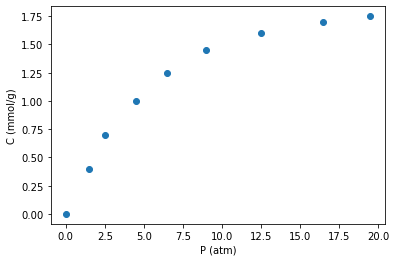

In [1]:
import numpy as np
from pyomo.environ import *
from pyomo.opt import SolverStatus, TerminationCondition

m = ConcreteModel()

i = list(range(9)) #index for 9 points 
P = [0, 1.5, 2.5, 4.5, 6.5, 9, 12.5, 16.5, 19.5] #Pressure measurements
C = [0, 0.4, 0.7, 1, 1.25, 1.45, 1.6, 1.7, 1.75]  #Adsorbed Concentration measurements

# Plot data:
import matplotlib.pyplot as plt
plt.scatter(P,C)
plt.xlabel('P (atm)')
plt.ylabel('C (mmol/g)')

solver status
ok
optimal
b[1]  :  0.521428571428571
b[2]  :  0.0714285714285715
Obj function value for linear fit:  1.8071428571428583


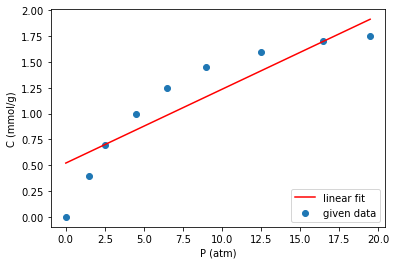

In [2]:
m = ConcreteModel()

m.b = Var(RangeSet(2), within = Reals)   #parameters of function 
m.z = Var(RangeSet(9), within = Reals)  #aux variables

error = [C[i] - (m.b[1] + m.b[2]*P[i])  for i in range(9)]

m.obj = Objective(expr = sum (m.z[i] for i in m.z),sense=minimize)
def aux_rule1(m, i):
    return m.z[i] >= error[i-1]
def aux_rule2(m, i):
    return m.z[i] >= -error[i-1]

m.c1 = Constraint(RangeSet(9), rule=aux_rule1)
m.c2 = Constraint(RangeSet(9), rule=aux_rule2)


solver = SolverFactory('glpk')
results = solver.solve(m)
print('solver status')
print(results.solver.status)
print(results.solver.termination_condition)


# Plot data:
import matplotlib.pyplot as plt
plt.scatter(P,C,label = "given data")
plt.xlabel('P (atm)')
plt.ylabel('C (mmol/g)')
plt.plot(P, [m.b[1].value + m.b[2].value*P[i] for i in range(9)],'r', label = "linear fit")
plt.legend(loc="lower right")

for i in m.b:
    print(str(m.b[i]),' : ', m.b[i].value)
print('Obj function value for linear fit: ',str(value(m.obj)))


    Answer part B here: 
       (i) The solution is global since it is a linear problem defined and the objetive function is convex. But observe that the function is not differentiable 
       (ii) Observe that the pattern is non-linear and hence using a linear model would not give a good fit. We can use a GLR model to capture the non-linearty better. Few example of the library of terms that we can use log, exponential or polynomial features would better capture the non-linearities.

## Problem 3: Principal Component Analysis (20 pts)

The data set that is loaded below was collected during a study that measured different compositions of particulates in the air, as well as different conditions of the weather on the days of the measurements (Features 1-13, or F1, ..., F13). Each row corresponds to a different measurement at a different day and time, and each column corresponds to features that were measured (concentrations of chemicals in air and weather conditions like Temperature, humidity, etc. There are a total of 13 features (columns) and you want to perform some analysis on this data set. 

A. Your colleague recommends that you perform Principal Component Analysis on this data set first. Do you agree with this decision and why? List three reasons why PCA is used. <br> 

B. The code provided below uploads the data set and performs PCA on the data set. Commented code also provided below can be used to plot explained variance and loadings. The code might not be complete (i.e., there might be other important steps on processing the data that could be missing). Use (and if needed modify) the code below and generate any figures you need to answer the following: <br>
(i)  Can you reduce the dimensionality of this data set, and if so how many PCs would you keep and why? <br>
(ii) Are any features highly correlated and why? <br>
(iii) Bonus (5 pts): Would there be another way, other than PCA, to identify if any features are correlated, and if yes, provide the code (and figure) to perform the alternative analysis. 

PC1: 50.82%
PC2: 22.62%
PC3: 10.82%
PC4: 7.92%
PC5: 3.02%
PC6: 1.88%
PC7: 1.00%
PC8: 0.80%
PC9: 0.58%
PC10: 0.30%
PC11: 0.22%
PC12: 0.02%
PC13: 0.00%
-------------------------------------------------------------------------------------------------------------
* variance captured by the  6  PCs :  97.07207954546419 %
-------------------------------------------------------------------------------------------------------------


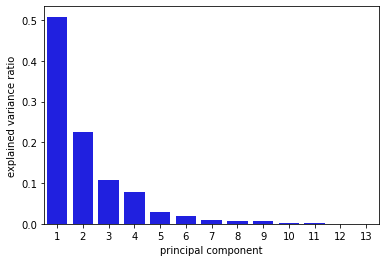

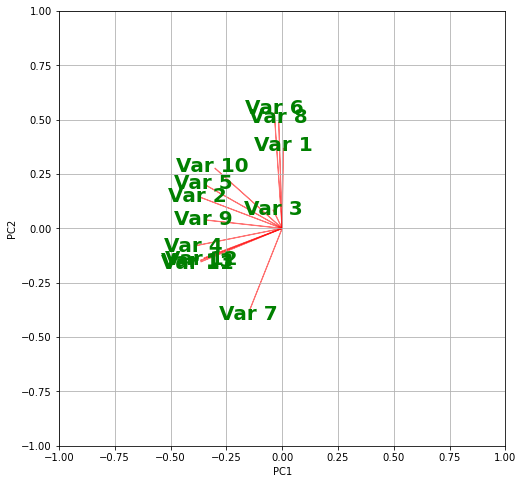

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## import data
data = pd.read_excel('Problem3.xlsx',nrows=9132)
## split inputs and outputs
X1=data[['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13']]

xlabels = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13']

X1 = StandardScaler().fit_transform(X1)
pca = PCA().fit(X1)
#print(pca.explained_variance_ratio_)
for i, evr in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {evr:.2%}")
print('-------------------------------------------------------------------------------------------------------------')
print('* variance captured by the ', str(6),' PCs : ',str(np.sum(pca.explained_variance_ratio_[0:6])*100), '%')
print('-------------------------------------------------------------------------------------------------------------')
#------------------------------------------------------------------------------------------------------- 
    
fig, ax = plt.subplots()
sns.barplot(np.arange(1, len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_,color='blue')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance ratio')
plt.show()


# define function to plot loading plot
def loading_plot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0] * 1.05, coeff[i,1] * 1.05, "Var " + str(i + 1), color='g', ha='center', va='center', size=20, weight='bold')
        else:
            plt.text(coeff[i,0] * 1.05, coeff[i,1] * 1.05, labels[i], color='g', ha='center', va='center', size=20, weight='bold')

fig, ax = plt.subplots(figsize=(8, 8))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

# call the function with the first two PCs
loading_plot(pca.components_[:,0:2], np.transpose(pca.components_[0:2, :]))
plt.show()


    Provide any text answers to A and B here: 
    (i) Can you reduce the dimensionality of this data set, and if so how many PCs would you keep and why?
    yes, clearly we can reduce the dimension here. I would keep 6 PCs, they explain a cumulative variance of ~98%
    
    (ii) Are any features highly correlated and why?
    yes, the correlation values range as high as ~1. Especially the features 11, 12 and 13 are highly correlated

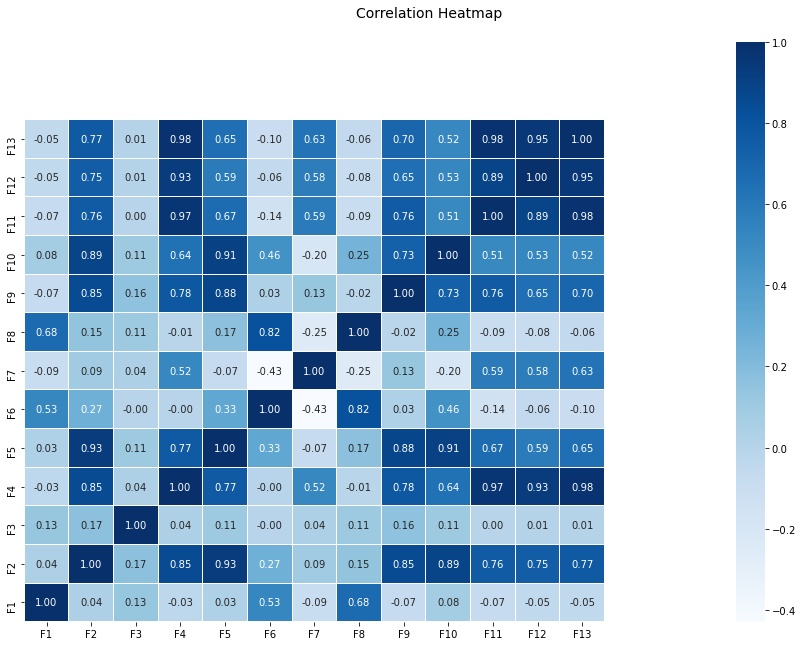

In [4]:
##Answer Bonus here.
##1 point for mentioning what other approach to find correlations.
##4 more points for actually coding it.

'''We can directly calculate the correlation values to check if the variables are correlated. 
For example we can use pearson correlation to find the correlation value between two variables
This infact is the idea behind PCA
But we maximize the covariance values of the variables. Notice that covariance and correlation are equal for a scaled variable
Which is what we do during PCA'''
#------------------------------------------------------------------------------------------------------- 
def plot_covariance(df,colNames):
    """ Plot correlation matrix """

    fig, ax = plt.subplots(figsize=(15, 10))
    corr = df.corr()
    hm = sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap="Blues", fmt='.2f',
                     linewidths=.05, xticklabels=colNames.T, yticklabels=colNames.T)
    fig.subplots_adjust(top=0.93)
    t = fig.suptitle('Correlation Heatmap', fontsize=14)
    bottom = 0
    top = len(df.columns)
    ax.set_ylim(bottom, top)
plot_covariance(data,np.array(xlabels))
#------------------------------------------------------------------------------------------------------- 

## Problem 4: Model-Based Optimization (20 pts)
In this problem, you are asked to optimize a problem that is not available in closed-form, but exists as a black-box simulation. Both inputs $x_1, x_2$ can range only between $[-4.5, 4.5]$. To generate data, we have provided the black-box simulation as a definition (bb). 

The provided code below contains parts that: (a) generate data (alternatives exist), (b) trains a Gaussian Process Regression model with cross-validation, (c) plots fitted and actual response surfaces, (d) optimizes the fitted GPR model and the actual bb equation (for comparison). Use and/or modify any parts of the code provided below to answer the following questions:

A. Design your computer experiment (DoE) by deciding how many points and where to locate them by uncommenting any part of the code you prefer, or writing your own. Describe what your initial decision was for a DoE (type, size). You do not have any information regarding the cost of the "bb" model, but assume that it is relatively "fast" and you have available resources.

B. After collecting your initial data, fit a GPR model using the provided code. Is the fitted GPR model a good approximation and why (yes or no)? Report Average CV error for DoE in part A.

C. Optimize (minimize) the actual bb model with code provided below using ipopt. Is the solution guaranteed to be the global minimum? If yes great. If no, how could you (by changing one specification in the Pyomo model repeatedly) try to find the global optimum? Describe your steps and report the best minimum (x-y) you found by your process. 

D. Optimize (minimize) the surrogate fit with code provided below using scipy optimizer. Report the solution x-y. Is this solution the same or different than one you found in part C and why?

E. In an effort to improve the result you're getting from the surrogate-based optimization (get surrogate optimum to be more similar to the true optimum), identify ONE change you can make to any part of the code below, make it and rerun. Describe what you did, whether it improved results or not, and why yes or why not?

F. (Bonus 5 points) In order to add more samples to improve the surrogate model, you want to use an exploration criterion. Assume now you know the explicit form of the bb function. Since you know both the black-box equation and the surrogate equation, come up with a function that when maximized, would give you new exploration sampling locations. Don't optimize it, just provide the equation (3pts) and plot it (2pts) to get all 5 bonus points. 

In [5]:
## Code of black-box function, data generation, plotting of DoE. Uncomment and modify anything you need to:
import numpy as np
import pyDOE as doe
import matplotlib.pyplot as plt

## Define the black box function
def bb(x1,x2):
    return (1.5 - x1 + x1*x2)**2 + (2.25 - x1 + x1*x2**2)**2 + (2.625 - x1 + x1*x2**3)**2

In [20]:
#alternative: pyDOE can be used!

def lhs_sampling(dimension,num_samples,criterion = 'random'):
    
    #this generates LHS between 0,1. Real data to be scaled accordingly
    lbs = np.arange(0, num_samples)/num_samples
    ubs = np.arange(1, 1+num_samples)/num_samples
    if criterion == 'random':
        generatedPoints = np.random.uniform(lbs,ubs,[dimension,num_samples])
    elif criterion == 'centered':
        generatedPoints = np.random.uniform(lbs+1/2/num_samples,ubs-1/2/num_samples,[dimension,num_samples])
    
    for i in range(1,dim):
        #since all variables x1,x2,x3.. are generated in the same order (0,1) ascending, shuffle them
        np.random.shuffle(generatedPoints[i,:])
    return np.transpose(generatedPoints)

Text(0.5, 1.0, 'LHS - centered')

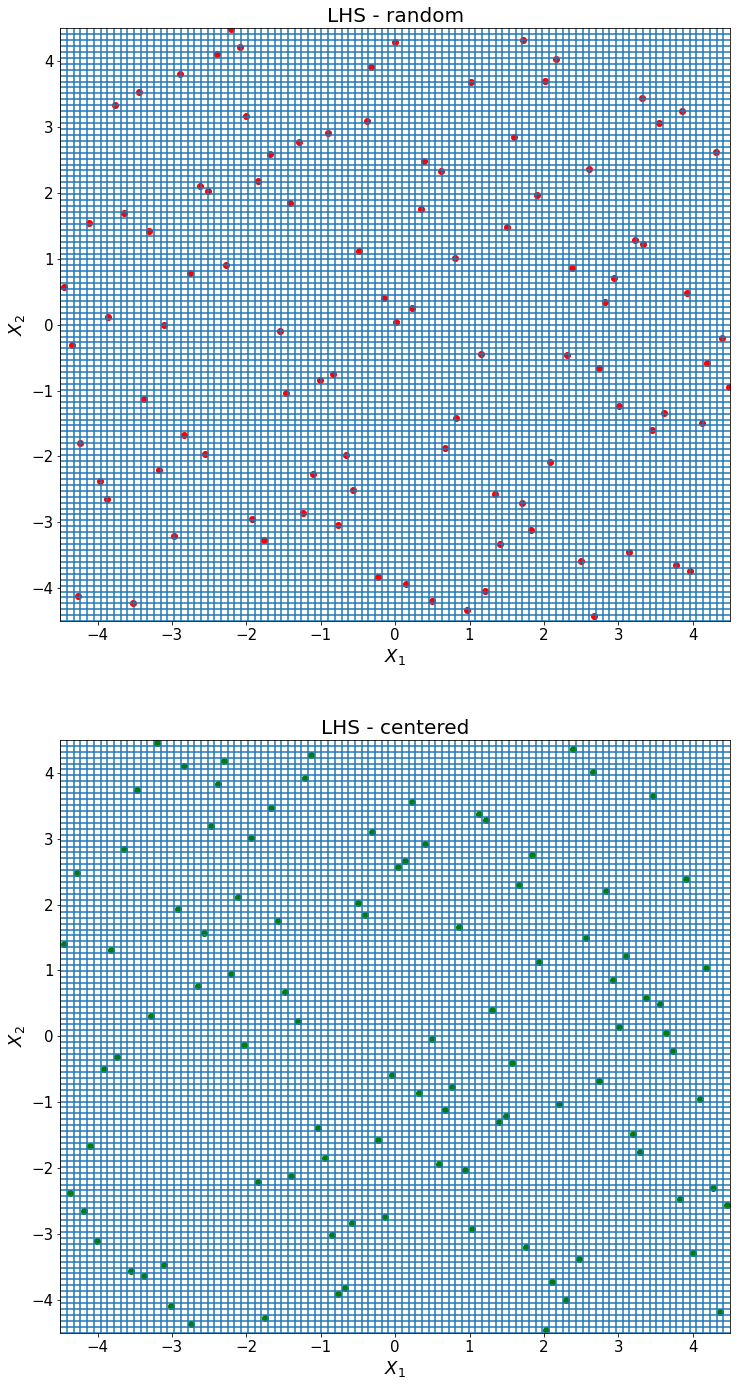

In [21]:
num_samples = 100
dim = 2

bounds1 = [-4.5,4.5]
bounds2 = [-4.5,4.5]
#-------------------------------------------------------------------------------------
samples = lhs_sampling(dim,num_samples,criterion = 'random')
samples[:,0] = bounds1[0] + samples[:,0]*(bounds1[1]-bounds1[0])
samples[:,1] = bounds2[0] + samples[:,1]*(bounds2[1]-bounds2[0])
#plot the generated data, LHS design
fig, ax = plt.subplots(2,1, figsize = [12,24])
ax[0].plot(samples[:,0], samples[:,1],'o', ms=6,markerfacecolor='red',markeredgecolor='red',alpha=1.);
ax[0].set_xlim([bounds1[0],bounds1[1]])
ax[0].set_ylim([bounds2[0],bounds2[1]])
for i in np.arange(bounds1[0],bounds1[1],(bounds1[1]-bounds1[0])/num_samples):
    ax[0].axvline(i)
for i in np.arange(bounds2[0],bounds2[1],(bounds2[1]-bounds2[0])/num_samples):
    ax[0].axhline(i)
    
ax[0].xaxis.set_tick_params(labelsize=15)
ax[0].yaxis.set_tick_params(labelsize=15)
ax[0].set_xlabel('$X_1$', fontsize=18)
ax[0].set_ylabel('$X_2$', fontsize=18)
ax[0].set_title('LHS - random', fontsize=20)

#---------------------------------------------------------------------------------
samples = lhs_sampling(dim,num_samples,criterion = 'centered')
samples[:,0] = bounds1[0] + samples[:,0]*(bounds1[1]-bounds1[0])
samples[:,1] = bounds2[0] + samples[:,1]*(bounds2[1]-bounds2[0])
#plot the generated data, LHS design
ax[1].plot(samples[:,0], samples[:,1],'o', ms=6,markerfacecolor='green',markeredgecolor='green',alpha=1.);
ax[1].set_xlim([bounds1[0],bounds1[1]])
ax[1].set_ylim([bounds2[0],bounds2[1]])
for i in np.arange(bounds1[0],bounds1[1],(bounds1[1]-bounds1[0])/num_samples):
    ax[1].axvline(i)
for i in np.arange(bounds2[0],bounds2[1],(bounds2[1]-bounds2[0])/num_samples):
    ax[1].axhline(i)
    
ax[1].xaxis.set_tick_params(labelsize=15)
ax[1].yaxis.set_tick_params(labelsize=15)
ax[1].set_xlabel('$X_1$', fontsize=18)
ax[1].set_ylabel('$X_2$', fontsize=18)
ax[1].set_title('LHS - centered', fontsize=20)

(None, None)

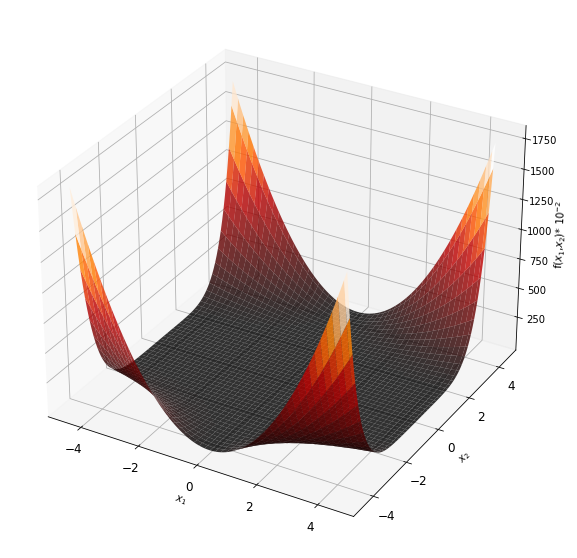

In [8]:
samples = lhs_sampling(dim,num_samples,criterion = 'centered')
x1 = bounds1[0] + samples[:,0]*(bounds1[1]-bounds1[0])
x2 = bounds2[0] + samples[:,1]*(bounds2[1]-bounds2[0])
x = np.vstack((x1,x2)).T
y = bb(x1,x2)


y_scaled = (y-min(y))/(max(y)-min(y))
x_scaled = samples

#------------------------------------------------------------------------------------------------------------------
#plotting (x1,x2) vs f(x1,x2)
X1,X2 = np.meshgrid(np.linspace(-4.5,4.5,100),np.linspace(-4.5,4.5,100))
F = bb(X1,X2)/100
fig = plt.figure(figsize = [10,10])
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, F, cmap='gist_heat',alpha=0.8, edgecolor='none')
ax.set(xlabel = '$x_1$', ylabel ='$x_2$', zlabel = 'f($x_1$,$x_2$)* $10^{-2}$') 
ax.xaxis.set_tick_params(labelsize=12), ax.yaxis.set_tick_params(labelsize=12)

average CV error: 0.0147


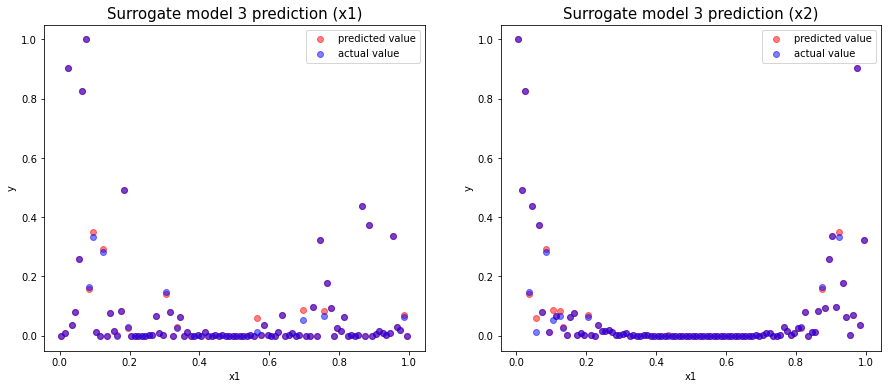

r2 score of the fit :  0.9986886075574983


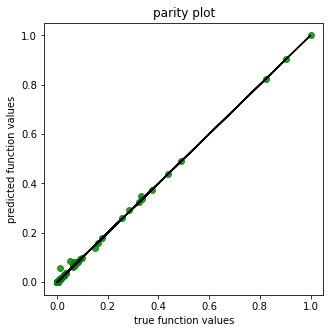

In [9]:
## Code to fit GPR model and use 5-fold cross validation to calculate average CV error:
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
import scipy as scp
from sklearn.metrics import r2_score


## CV from sklearn
from sklearn.model_selection import KFold

# create k-fold object
kf = KFold(n_splits=5, shuffle=True)

## create GPR model, with RBF kernel
gp = GPR(kernel=RBF(0.1, (1e-2, 1e2)))

cv_e = {}
cv_data = {}


# cross validation 
i = 0
for train_index, test_index in kf.split(x_scaled):
    
   # split training and testing set
    x_train, x_test = x_scaled[train_index], x_scaled[test_index]
    y_train, y_test = y_scaled[train_index], y_scaled[test_index]

    # fit GPR model
    gpmodel = gp.fit(x_train, y_train)

    # predict
    y_pred = np.array(gpmodel.predict(x_test))

    # calculate error
    err = sum((y_pred - y_test)**2)

    # record data and error
    cv_e[i] = err
    cv_data[i] = {'x': x_train,'y': y_train}

    i += 1

# pick the best model
best_cv = min(cv_e, key=cv_e.get)
best_data = cv_data[best_cv]
best_gp = gp.fit(best_data['x'],best_data['y'])

# calculate the average CV error
print(f"average CV error: {sum(cv_e[i] for i in range(len(cv_e)))/len(cv_e):.4f}")




# visualize prediction
fig, ax = plt.subplots(1, 2, figsize=(15,6))

y_gp = best_gp.predict(samples)

ax[0].scatter(x_scaled[:,0], y_gp, color='red', alpha=0.5, label='predicted value')
ax[0].scatter(x_scaled[:,0], y_scaled, color='blue', alpha=0.5, label='actual value')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('y')
ax[0].set_title('Surrogate model 3 prediction (x1)', fontsize=15)
ax[0].legend()

ax[1].scatter(x_scaled[:,1], y_gp, color='red', alpha=0.5, label='predicted value')
ax[1].scatter(x_scaled[:,1], y_scaled, color='blue', alpha=0.5, label='actual value')
ax[1].set_xlabel('x1')
ax[1].set_ylabel('y')
ax[1].set_title('Surrogate model 3 prediction (x2)', fontsize=15)
ax[1].legend()

plt.show()

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(y_scaled,y_gp,'o', c = 'g', alpha=0.8)
ax.plot(y_scaled,y_scaled, '-k')
ax.set(xlabel='true function values', ylabel='predicted function values', title='parity plot')
pass
print('r2 score of the fit : ', r2_score(y_scaled,y_gp))


Optimal solution of surrogate model 3:
	x1:	3.98
	x2:	0.17
	obj:	-279.96


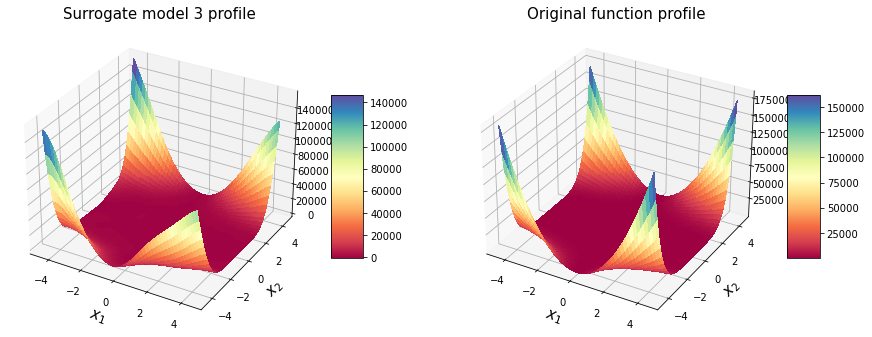

In [10]:
## Code that optimizes fitted GPR model using a Truncuated Newton Method (local optimization method)
## define wrapper function

import scipy as scp
def gp_model(guess):
    test = np.array([[guess[0],guess[1]]])
    return best_gp.predict(test)[0]

# optimize the best GP model
initial_guess = np.array([1,0])
bnds = ((0, 1), (0, 1))
gp_optimize_result = scp.optimize.minimize(gp_model, initial_guess, bounds=bnds, method='TNC')

bounds = np.array([[-4.5, 4.5], [-4.5, 4.5]]).T
f = y
# print results
result_surr_3 = {}
result_surr_3['x1'] = gp_optimize_result.x[0] * (bounds[1, 0] - bounds[0, 0]) + bounds[0, 0]
result_surr_3['x2'] = gp_optimize_result.x[1] * (bounds[1, 1] - bounds[0, 1]) + bounds[0, 1]
result_surr_3['obj'] = gp_optimize_result.fun * (max(f) - min(f)) + min(f)
print("Optimal solution of surrogate model 3:")
for key, value in result_surr_3.items():
   print(f"\t{key}:\t{value:.2f}")
    

## compare model profile

# setup grid
x_1_range = np.linspace(-4.5, 4.5, 100)
x_2_range = np.linspace(-4.5, 4.5, 100)
x_range = np.transpose(np.array([x_1_range, x_2_range]))
X_1, X_2 = np.meshgrid(x_1_range, x_2_range)


X_1gp, X_2gp = np.meshgrid(np.linspace(0,1, 100), np.linspace(0,1, 100))

## compute model values
m, n = X_1.shape
surr_3_value = np.zeros((m, n))
blackbox_value = np.zeros((m, n))
error_value= np.zeros((m, n))
for i in range(m):
    for j in range(n):
        surr_3_value[i, j] = best_gp.predict(np.array(((X_1gp[i, j]), X_2gp[i, j])).reshape(1, -1))[0] * (max(f) - min(f)) + min(f)
        blackbox_value[i, j] = bb(X_1[i, j], X_2[i, j]).reshape(1, -1)
        error_value[i,j] = (bb(X_1[i, j], X_2[i, j]).reshape(1, -1) - (best_gp.predict(np.array(((X_1gp[i, j]), X_2gp[i, j])).reshape(1, -1))[0] * (max(f) - min(f)) + min(f)))**2

# plot profile
fig, ax = plt.subplots(1,2, subplot_kw={"projection":"3d"}, figsize=(15,15))

# plot surrogate model
surf_1 = ax[0].plot_surface(X_1, X_2, surr_3_value, cmap=plt.cm.Spectral, antialiased=False)
ax[0].set_xlabel('$x_1$', fontsize=15)
ax[0].set_ylabel('$x_2$', fontsize=15)
ax[0].set_title('Surrogate model 3 profile', fontsize=15)
fig.colorbar(surf_1, ax=ax[0], shrink=0.2, aspect=5)

# plot original function
surf_2 = ax[1].plot_surface(X_1, X_2, blackbox_value, zorder=1, cmap=plt.cm.Spectral, antialiased=False)
ax[1].set_xlabel('$x_1$', fontsize=15)
ax[1].set_ylabel('$x_2$', fontsize=15)
ax[1].set_title('Original function profile', fontsize=15)
fig.colorbar(surf_2, ax=ax[1], shrink=0.2, aspect=5)

In [11]:
## Code that creates and optimizes Pyomo model for original black-box function
import pyomo.environ as pe
m_origin = pe.ConcreteModel()
m_origin.x1 = pe.Var(bounds=(-4.5, 4.5), initialize=3)
m_origin.x2 = pe.Var(bounds=(-4.5, 4.5), initialize=0.5)

def obj(m):
    return (1.5 - m.x1 + m.x1*m.x2)**2 + (2.25 - m.x1 + m.x1*m.x2**2)**2 + (2.625 - m.x1 + m.x1*m.x2**3)**2


m_origin.obj = pe.Objective(rule=obj)
solver = pe.SolverFactory('ipopt')
solver.solve(m_origin)

result_origin = {}
result_origin['x1'] = pe.value(m_origin.x1)
result_origin['x2'] = pe.value(m_origin.x2)
result_origin['obj'] = pe.value(m_origin.obj)
print("Optimal solution of original function:")
for key, value in result_origin.items():
    print(f"\t{key}:\t{value:.2f}")

Optimal solution of original function:
	x1:	3.00
	x2:	0.50
	obj:	0.00


Design your computer experiment (DoE) by deciding how many points and where to locate them by uncommenting any part of the code you prefer, or writing your own. Describe what your initial decision was for a DoE (type, size). You do not have any information regarding the cost of the "bb" model, but assume that it is relatively "fast" and you have available resources.

B. After collecting your initial data, fit a GPR model using the provided code. Is the fitted GPR model a good approximation and why (yes or no)? Report Average CV error for DoE in part A.

C. Optimize (minimize) the actual bb model with code provided below using ipopt. Is the solution guaranteed to be the global minimum? If yes great. If no, how could you (by changing one specification in the Pyomo model repeatedly) try to find the global optimum? Describe your steps and report the best minimum (x-y) you found by your process.

D. Optimize (minimize) the surrogate fit with code provided below using scipy optimizer. Report the solution x-y. Is this solution the same or different than one you found in part C and why?

E. In an effort to improve the result you're getting from the surrogate-based optimization (get surrogate optimum to be more similar to the true optimum), identify ONE change you can make to any part of the code below, make it and rerun. Describe what you did, whether it improved results or not, and why yes or why not?

F. (Bonus 5 points) In order to add more samples to improve the surrogate model, you want to use an exploration criterion. Assume now you know the explicit form of the bb function. Since you know both the black-box equation and the surrogate equation, come up with a function that when maximized, would give you new exploration sampling locations. Don't optimize it, just provide the equation (3pts) and plot it (2pts) to get all 5 bonus points.

Write all your text answers here!

    A) LHS is considered. Since the simulation is fast we can use more # of samples, here we consider 100 samples
    B) Yes, the fitted GPR is a good approximation. Same can be seen in the model fit plot.
    C) The IPOPT slution here is global solution. obj = 0. For cases where it is not global, we can split the interval into parts and keep running IPOPT in each interval in a loop and find the global (similar to multistart algorithm)
    D) The GP solution is different from actual value. This can be improved by adding more pounts or training the model on entire data
    E) Tune the kernel used for surrogate construction. (see the result below)
    F) We have to maximize the following function
    
\begin{aligned}
E I(\mathbf{x}) &=(\underbrace{\xi-\hat{y}(\mathbf{x})) \Phi(z)}_{\text {exploitation }}+\underbrace{\sigma(\mathbf{x}) \phi(z)}_{\text {exploration }}\\
z &=(\xi-\hat{y}(\mathbf{x})) / \sigma(\mathbf{x})
\end{aligned}

And $\xi$ is present best solution. $\Phi$(⋅) and $\phi$(⋅) denotes the standard normal and cumulative density function

In [12]:
from scipy.stats import norm
ypred, sigma = best_gp.predict(samples, return_std = True)
ypred = ypred*(max(y) - min(y)) + min(y)
currentbest = min(bb(x1,x2))
imp = currentbest - ypred
Z = imp/sigma
ei = imp * norm.cdf(Z) + sigma * norm.pdf(Z)

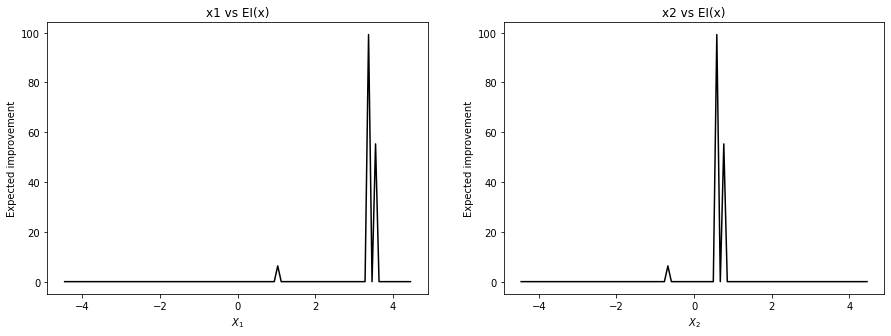

In [13]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(x1,ei, '-k')
ax[0].set(xlabel='$X_1$', ylabel='Expected improvement', title='x1 vs EI(x)')

ax[1].plot(np.sort(x2),[ei[i] for i in np.argsort(x2)], '-k')
ax[1].set(xlabel='$X_2$', ylabel='Expected improvement', title='x2 vs EI(x)')

pass


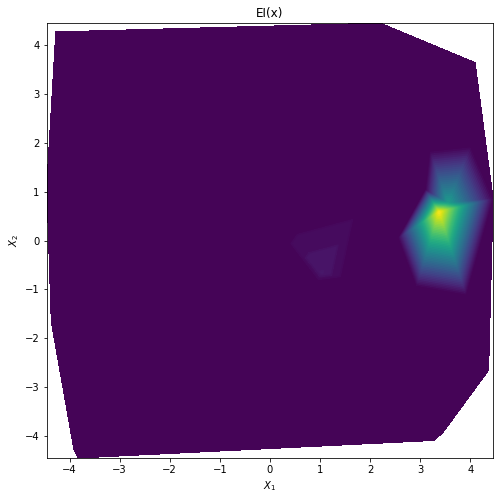

In [14]:
limit = np.linspace(min(ei),max(ei),50)
fig, ax = plt.subplots(figsize=(8,8))
ax.tricontour(x1,x2,ei,limit) 
ax.tricontourf(x1,x2,ei,limit) 
ax.set(xlabel='$X_1$', ylabel='$X_2$', title='EI(x)')
plt.show()

## Problem 5: Find the model question (20 pts)

You are given a data-set of a problem with two input variables, and one output. <br> 
- This data set represents a physical law, but you don't know exactly which one it is. <br>
- After taking the Data-Driven Process Systems Engineering course, you are convinced that you can identify the 'natural' or 'physics' based law of this data set, using Machine Learning (Generalized Linear Regression) and Optimization. <br>
- The model will be a GLR model, but you are not constrained with respect to what nonlinear features can be used. <br>
- The data provided does not need to be scaled any further. <br>

Use the code provided below (similar to code used in Homework 4), to identify the relationship that best describes the data, and one that has the minimum possible number of terms. Since there are two variables that are important, the model with the least number of terms will be a 2 parameter model. You will not be penalized if you don't find THE BEST model, as long as you are able to identify a model with at most three terms and an average cross validation error below 0.1.

The provided code below allows you to fit two different models at a time, perform cross-validation and grid search over the regularization parameter. It prints the best model out of the two and their respective parameter values. Modify the code as you see fit, and run it as many times as you need in order to find the best model. To get points, you must answer the following: 

A. What Design of Experiments was used to collect the data? Do you believe you have enough data? <br>

B. What is your best model (provide equation), the optimal parameters and lambda parameter (provide values), average cross validation error (provide values). <br>

C. Describe, briefly what steps you followed to find it. For example, what did you change in the code, how did you change the code from iteration to iteration, until you found the model you provided in part B. <br>

total number of samples 61
dimensionality of data set 2


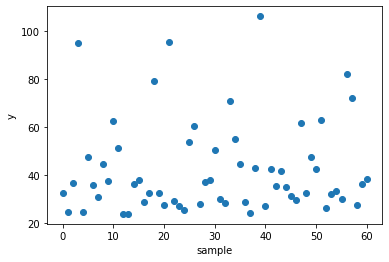

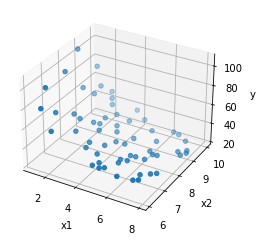

Text(0, 0.5, 'x2')

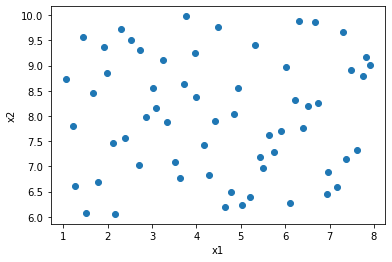

In [15]:
## Code that loads the data and plots output in 1D and 3D and input 2D
import numpy as np
## Load data
x = np.load('x.npy')
y = np.load('y.npy')
x_scaled = x #Do not further scale data
y_scaled = y #Do not further scale data
sample = len(y)
dim = 2
print('total number of samples',sample)
print('dimensionality of data set',dim)


## Plot output measurements:
import matplotlib.pyplot as plt
plt.scatter(list(range(sample)),y)
plt.xlabel('sample')
plt.ylabel('y')


## plot 3d scatterplot of data:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
xs = x[:,0]
ys = x[:,1]
zs = y
ax.scatter(xs, ys, zs)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()

## plot sample locations:
plt.scatter(xs,ys)
plt.xlabel('x1')
plt.ylabel('x2')

In [16]:
## Code that transforms data set into feature space. Use any features you want. 
## You can test two separate models at the same time:
import pyomo.environ as pe


## define two functions to generate new features
def mat_1(x):
    """Return matrix of 1/x1, 1/x2, 1/x1^2, 1/x2^2"""
    m, n = np.shape(x)
    mat = np.array([1./x[:,0], 1./x[:,0], 1./x[:,1], 1./x[:,0]**2, 1./x[:,1]**2]).T
    return mat

def mat_2(x):
    """Return matrix of 1, x1, x2, x1x2, x1/x2"""
    m, n = np.shape(x)
    mat = np.array( [np.ones(m), x[:,0],  x[:,1], x[:,0]*x[:,1], x[:,0]/x[:,1]]).T
    return mat

## generate new features
X_new = {}
X_new['I1'] = mat_1(x_scaled)
X_new['I2'] = mat_2(x_scaled)
  
## Code below uses CV, and a Pyomo LASSO formulation to calculate optimal parameters, lamda, ...
## and average CV errors for models formed above. Modify any part of the code to get the results you want:
    
## CV from sklearn
from sklearn.model_selection import KFold

## create k-fold object
kf = KFold(n_splits=5, shuffle=True)

## lambda value set
lbda_set = np.logspace(-4, 0, num=11)

## create dict for average error of each feature set, and each lambda value
overall_avg_error = {}

## train the model for both feature sets
for feature_i, X in X_new.items():
    
    print(f'Feature set {feature_i}:')
    
    ## create index list for features
    feature_list = list(range(X.shape[1]))
    
    ## create dict for average error of each lambda value
    avg_error = {}
    
    ## grid-search lambda
    for lbda in lbda_set:
        

        ## create dictionary to record trained model for each fold
        CV_models = []

        ## 5-fold CV
        for train_index, test_index in kf.split(X):
            
            ## split training and test set
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y_scaled[train_index], y_scaled[test_index]

            ## create index list for training points
            train_point_list = list(range(X_train.shape[0]))

            ## -----------------------------------------------------------------------------------
            ## Pyomo model
            m = pe.ConcreteModel()

            ## define variables
            m.b = pe.Var(feature_list, within=pe.Reals)
            m.y_p = pe.Var(train_point_list, within=pe.Reals)
            m.b_p = pe.Var(feature_list, within=pe.NonNegativeReals)
            m.b_n = pe.Var(feature_list, within=pe.NonNegativeReals)

            ## define objective function
            def obj_rule(m):
                return sum((m.y_p[i] - y_train[i]) ** 2 for i in train_point_list) + lbda * sum(m.b_p[j] + m.b_n[j] for j in feature_list)
            m.obj = pe.Objective(rule=obj_rule)

            ## define constraints
            def con_rule1(m, i):
                return m.y_p[i] == sum(m.b[j] * X_train[i, j] for j in feature_list)
            m.con1 = pe.Constraint(train_point_list, rule=con_rule1)
            def con_rule2(m, j):
                return m.b[j] == m.b_p[j] - m.b_n[j]
            m.con2 = pe.Constraint(feature_list, rule=con_rule2)

            ## solve model using ipopt
            solver = pe.SolverFactory('ipopt')
            solver.solve(m)
            ## -----------------------------------------------------------------------------------
            
            ## record model for this fold
            tmp_model = {}
            ## record objective value
            tmp_model['obj'] = pe.value(m.obj)
            ## record parameter value
            tmp_model['b'] = np.empty((len(feature_list)))
            for i in feature_list:
                tmp_model['b'][i] = pe.value(m.b[i])
            ## Print optimal parameters for that iteration for monitoring:
            print('model parameters',tmp_model['b'])
            ## calculate test error
            tmp_model['error'] = sum((np.matmul(X_test, tmp_model['b'].T) - y_test) ** 2)
            ## record the model in CV_models
            CV_models.append(tmp_model)
        
        ## calculate average error of 5-fold CV
        avg_error[lbda] = sum(model['error'] for model in CV_models) / len(CV_models)
        
        print(f'\tlambda = {lbda:.1e}\taverage error = {avg_error[lbda]:.5f}')
        
    ## record error in overall_avg_error
    overall_avg_error[feature_i] = avg_error

## compare errors
best_error = {'I1': {}, 'I2': {}}
best_error['I1']['lambda'] = min(overall_avg_error['I1'], key=overall_avg_error['I1'].get)
best_error['I1']['error'] = overall_avg_error['I1'][best_error['I1']['lambda']]
best_error['I2']['lambda'] = min(overall_avg_error['I2'], key=overall_avg_error['I2'].get)
best_error['I2']['error'] = overall_avg_error['I2'][best_error['I2']['lambda']]

if best_error['I1']['error'] <= best_error['I2']['error']:
    better_feature_i = 'I1'
else:
    better_feature_i = 'I2'

## record better feature set and corresponding lambda
better_X = X_new[better_feature_i]
best_lambda = best_error[better_feature_i]['lambda']

print(f"\nBest feature set: {better_feature_i}, with lambda = {best_error[better_feature_i]['lambda']:.1e}, "
      f"error = {best_error[better_feature_i]['error']:.5f}.")

Feature set I1:
model parameters [ 5.00000304e+01  5.00000304e+01  9.99998256e+01 -3.10672237e-05
 -7.08020410e-08]
model parameters [ 5.00000213e+01  5.00000213e+01  9.99998510e+01 -1.01583660e-05
  5.31422323e-06]
model parameters [5.00000133e+01 5.00000133e+01 9.99998666e+01 1.28980717e-05
 5.40301141e-06]
model parameters [ 5.00000284e+01  5.00000284e+01  9.99998293e+01 -2.29952820e-05
  1.35628710e-05]
model parameters [ 5.00000233e+01  5.00000233e+01  9.99998500e+01 -1.63000009e-05
  5.36284926e-06]
	lambda = 1.0e-04	average error = 0.00000
model parameters [ 5.00000475e+01  5.00000475e+01  9.99996420e+01 -1.26099946e-05
  5.87415355e-06]
model parameters [ 5.00000572e+01  5.00000572e+01  9.99995849e+01 -1.17911907e-05
  5.21469301e-06]
model parameters [5.00000411e+01 5.00000411e+01 9.99996374e+01 1.18411738e-05
 5.99491814e-06]
model parameters [ 5.00000448e+01  5.00000448e+01  9.99996664e+01 -1.16016208e-05
  5.91417240e-06]
model parameters [5.00000335e+01 5.00000335e+01 9.99

model parameters [126.79821592 -24.18537759  -5.93280395   1.47703896  32.38198323]
	lambda = 4.0e-03	average error = 1410.82412
model parameters [145.0463092  -21.98603888  -8.69373489   1.57822289  13.794929  ]
model parameters [114.10411479 -14.84120639  -4.20257816   0.68662808   7.80132764]
model parameters [113.26001501   2.65515068  -3.85553314  -0.40965687 -62.84622279]
model parameters [66.53867537 -5.68899491  1.02979695 -0.26449702  2.2714857 ]
model parameters [108.93211437 -32.80168514  -3.42519243   1.72749856  81.13940183]
	lambda = 1.0e-02	average error = 1495.91194
model parameters [110.64994749 -15.66848928  -5.0308041    0.88482055  14.71183036]
model parameters [108.58598587 -10.74593953  -3.43031944   0.43098224  -9.34670602]
model parameters [126.00149192 -20.86093291  -5.38747774   1.17115345  21.24578052]
model parameters [ 1.04817600e+02 -5.20023984e+00 -3.14171196e+00  1.45205302e-02
 -2.52127232e+01]
model parameters [112.57807868 -27.25378004  -3.87155181   

A. What Design of Experiments was used to collect the data? Do you believe you have enough data?

B. What is your best model (provide equation), the optimal parameters and lambda parameter (provide values), average cross validation error (provide values).

C. Describe, briefly what steps you followed to find it. For example, what did you change in the code, how did you change the code from iteration to iteration, until you found the model you provided in part B.


    Answer A, B, and C here:

    (A) The data probably looks like LHS design. Yes, the data collected covers the entire space fairly enough.



    (B)best model:
$$ f(\mathbf{x})=100\left(\frac{1}{x_1}+\frac{1}{x_2}\right) $$

    Average cross-validation error = 0 with the hyper parameter 
$\lambda = 1e-4$.




    (C)Plotting the correlation of x1 and x2 with y shows they are inversely related, this suggests us to use terms containing x1 and x2 that have inverse relation with y

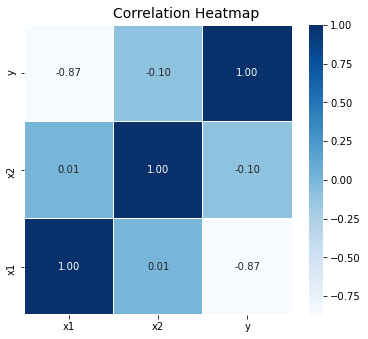

In [17]:
df = pd.DataFrame(np.vstack((xs,ys,zs)).T, columns = ['x1','x2','y'])

#------------------------------------------------------------------------------------------------------- 
def plot_correlation(df,colNames):
    """ Plot correlation matrix """
    import seaborn as sns
    fig, ax = plt.subplots(figsize=(6,5))
    corr = df.corr()
    hm = sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap="Blues", fmt='.2f',
                     linewidths=.05, xticklabels=colNames.T, yticklabels=colNames.T)
    fig.subplots_adjust(top=0.93)
    t = fig.suptitle('Correlation Heatmap', fontsize=14)
    bottom = 0
    top = len(df.columns)
    ax.set_ylim(bottom, top)
plot_correlation(df,np.array(['x1','x2','y']))
#------------------------------------------------------------------------------------------------------- 

# The End.. THANK YOU and GOOD LUCK!